<h1>Fraud Detection USING LSTM | Bidirectional RNN </h1>

In [16]:
import os
print("Dataset Path: ")
for dirname, _, filenames in os.walk('./fake-news/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Dataset Path: 
./fake-news/submit.csv
./fake-news/test.csv
./fake-news/train.csv


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM, SimpleRNN, Bidirectional
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# tf.__version__


import warnings 
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mubeen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
train = pd.read_csv("./fake-news/train.csv")
test = pd.read_csv("./fake-news/test.csv")

train.head(), train.shape
print(test.head(), test.shape)


      id                                              title  \
0  20800  Specter of Trump Loosens Tongues, if Not Purse...   
1  20801  Russian warships ready to strike terrorists ne...   
2  20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3  20803  Tim Tebow Will Attempt Another Comeback, This ...   
4  20804                    Keiser Report: Meme Wars (E995)   

                    author                                               text  
0         David Streitfeld  PALO ALTO, Calif.  —   After years of scorning...  
1                      NaN  Russian warships ready to strike terrorists ne...  
2            Common Dreams  Videos #NoDAPL: Native American Leaders Vow to...  
3            Daniel Victor  If at first you don’t succeed, try a different...  
4  Truth Broadcast Network  42 mins ago 1 Views 0 Comments 0 Likes 'For th...   (5200, 4)


In [47]:
df = train.dropna()
X = df.drop("label", axis = 1)
# X.shape

y = df["label"]
# X.shape
print(y)
y.shape

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64


(18285,)

In [44]:
messages=X.copy()
messages['title'][1]
messages.reset_index(inplace=True)
messages

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


<H2>Vectorization & Embeddings</h2>

In [32]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


In [33]:
voc = 10000
onehot_repr=[one_hot(words,voc)for words in corpus]

sent_length = 20 
embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)
embedded_docs, len(embedded_docs),y.shape

(array([[   0,    0,    0, ..., 6125, 2993,   54],
        [   0,    0,    0, ..., 6281, 5363, 9733],
        [   0,    0,    0, ..., 9686, 8761, 8514],
        ...,
        [   0,    0,    0, ..., 2609, 8235, 1558],
        [   0,    0,    0, ..., 9768, 6451, 8149],
        [   0,    0,    0, ..., 4578, 6736, 4933]], dtype=int32),
 18285,
 (18285,))

In [34]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

X_final.shape,y_final.shape

((18285, 20), (18285,))

<H4>Split Data </H4>

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [36]:
y_train,y_train.shape

(array([1, 1, 0, ..., 0, 0, 1]), (12250,))

In [37]:
X_train

array([[   0,    0,    0, ...,    0,    0, 3374],
       [   0,    0,    0, ...,    0,    0,  513],
       [   0,    0,    0, ..., 2609, 8235, 1558],
       ...,
       [   0,    0,    0, ..., 2609, 8235, 1558],
       [   0,    0,    0, ..., 1724,  507, 9733],
       [   0,    0,    0, ..., 3384, 3917, 6969]], dtype=int32)

<h1>Bi-Directional LSTM </h1>

In [38]:
embedding_vector_features=40
bid=Sequential()
bid.add(Embedding(voc,embedding_vector_features,input_length=sent_length))
bid.add(Bidirectional(LSTM(100)))
bid.add(Dropout(0.3))
bid.add(Dense(1,activation='sigmoid'))
bid.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
bid.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            400000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               112800    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 513001 (1.96 MB)
Trainable params: 513001 (1.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
history = bid.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64)


Epoch 1/20


2023-10-31 10:47:07.610907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-31 10:47:07.954988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-31 10:47:07.981776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-31 10:47:08.156086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  1/192 [..............................] - ETA: 6:33 - loss: 0.6932 - accuracy: 0.5312

2023-10-31 10:47:08.187501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


192/192 [==============================] - ETA: 0s - loss: 0.2964 - accuracy: 0.8619

2023-10-31 10:47:14.182896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-31 10:47:14.284642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-31 10:47:14.298968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


192/192 [==============================] - 9s 37ms/step - loss: 0.2964 - accuracy: 0.8619 - val_loss: 0.1909 - val_accuracy: 0.9178
Epoch 2/20
192/192 [==============================] - 6s 29ms/step - loss: 0.1245 - accuracy: 0.9538 - val_loss: 0.1951 - val_accuracy: 0.9193
Epoch 3/20
192/192 [==============================] - 5s 29ms/step - loss: 0.0749 - accuracy: 0.9724 - val_loss: 0.2449 - val_accuracy: 0.9150
Epoch 4/20
192/192 [==============================] - 6s 30ms/step - loss: 0.0460 - accuracy: 0.9849 - val_loss: 0.2959 - val_accuracy: 0.9138
Epoch 5/20
192/192 [==============================] - 6s 29ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.3170 - val_accuracy: 0.9176
Epoch 6/20
192/192 [==============================] - 6s 30ms/step - loss: 0.0233 - accuracy: 0.9931 - val_loss: 0.3618 - val_accuracy: 0.9097
Epoch 7/20
192/192 [==============================] - 6s 29ms/step - loss: 0.0173 - accuracy: 0.9941 - val_loss: 0.3893 - val_accuracy: 0.9130
Epoch 8/20

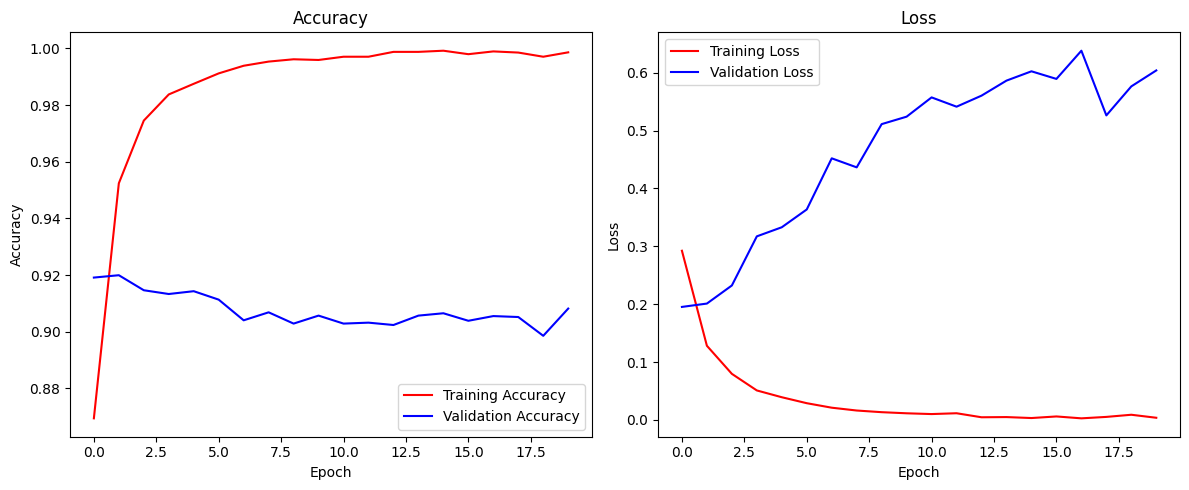

In [14]:
plt.figure(figsize=(12, 5))

#  Accuracy
plt.subplot(1, 2, 1)  
plt.plot(history.history["accuracy"], label="Training Accuracy", c="red")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", c="blue")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

#  Loss
plt.subplot(1, 2, 2)  
plt.plot(history.history["loss"], label="Training Loss", c="red")
plt.plot(history.history["val_loss"], label="Validation Loss", c="blue")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


plt.tight_layout()  
plt.show()

In [63]:
print(X_test)
y_bid=bid.predict(X_test)
y_bid = (y_bid>0.5).astype(int)
print(y_bid)

[[   0    0    0 ... 5794 2571  513]
 [   0    0    0 ... 2609 8235 1558]
 [   0    0    0 ... 2609 8235 1558]
 ...
 [   0    0    0 ... 2609 8235 1558]
 [   0    0    0 ...    0    0 6809]
 [   0    0    0 ... 8251 1158 6915]]
189/189 [==============================] - 2s 9ms/step
[[1]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]


In [22]:
accuracy_score(y_test,y_bid)

0.9101905550952776

In [23]:
confusion_matrix(y_test,y_bid)

array([[3118,  301],
       [ 241, 2375]])

In [26]:
print(classification_report(y_test,y_bid))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3419
           1       0.89      0.91      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



In [97]:
new_data =  [
    {
    
    "id" :len(train) + 1,
    "title": "Specter of Trump Loosens Tongues, if Not Purse Strings, in Silicon Valley - The New York Times",
    "author": "David Streitfeld",
    "text": "PALO ALTO, Calif. — After years of scorning the political process, Silicon Valley has leapt into the fray. The prospect of a President Donald J. Trump is pushing the tech community to move beyond its traditional role as donors and to embrace a new existence as agitators and activists. A distinguished venture capital firm emblazoned on its corporate home page an earthy epithet. One prominent tech chieftain says the consequences of Mr. Trump’s election would “range between disastrous and terrible.” Another compares him to a dictator. And nearly 150 tech leaders signed an open letter decrying Mr. Trump and his campaign of “anger” and “bigotry.” Not quite all the action is . Peter Thiel, a founder of PayPal and Palantir who was the first outside investor in Facebook, spoke at the Republican convention in July. The New York Times reported on Saturday that Mr. Thiel is giving $1.25 million to support Mr. Trump’s candidacy even as other supporters flee. (He also recently gave $1 million to a “super PAC” that supports Senator Rob Portman, the Republican freshman running for in Ohio.) Getting involved in politics used to be seen as clashing with Silicon Valley’s value system: You transform the world by making problems obsolete, not solving them through Washington. Nor did entrepreneurs want to alienate whatever segment of customers did not agree with them politically. Such reticence is no longer in style here. “We’re a bunch of nerds not used to having a lot of limelight,” said Dave McClure, an investor who runs a tech incubator called 500 Startups. “But to quote ‘With great power comes great responsibility.’” Mr. McClure grew worried after the Republican and Democratic conventions as Mr. Trump began to catch up to Hillary Clinton in the polls. He wanted Silicon Valley to do more, and so late last month he announced Nerdz4Hillary, an informal effort. An initial group of donors pledged $50,000 the goal was to ask the “nerdz” for small donations to match that sum. They have not come through yet. “We’re kind of optimistic we’ll get the other $50,000 in a few weeks,” Mr. McClure said. That relatively slow pace reflects Silicon Valley’s shifting position: Even as it becomes increasingly free with its opinions, it has been less free with its checkbook. The most recent data, from late August, shows Mrs. Clinton taking in $7.7 million from the tech community, according to Crowdpac, a that tracks donations. By that point in 2012, Crowdpac says, President Obama had raised $21 million from entrepreneurs and venture capitalists. Reid Hoffman, the billionaire of the business networking site LinkedIn, offers a snapshot of Silicon Valley’s evolving approach to politics. Mr. Hoffman was a top Obama donor, giving $1 million to the Priorities USA political action committee, something several of his peers did as well. Last month, Mr. Hoffman garnered worldwide publicity for saying he would donate up to $5 million to veterans’ groups if Mr. Trump released his taxes, a remote possibility that never came to pass. He has castigated Mr. Trump in interviews, saying he was speaking for those who were afraid. Mr. Hoffman’s outright donations, however, have been smaller this election cycle. In May, he gave $400,000 to the Hillary Victory Fund. Asked if there was more recent giving that had not shown up in federal election records, Mr. Hoffman cryptically responded in an email, “Looking at some PACs, etc.” He declined several opportunities to elaborate. Even as Priorities USA has raised $133 million this election cycle, far exceeding its total in 2012, its tech contributions have dwindled. The only familiar tech name this time around is John Doerr of the venture capital firm Kleiner Perkins Caufield Byers, who gave $500,000. The AOL Steve Case said his September endorsement of Mrs. Clinton, via an in The Washington Post, was the first time he ever publicly declared for a candidate. “I always focused on policy and"
    },

    {
    'id': len(train) + 2,
    'title': "F.B.I. Director James Comey Recommends No Charges for Hillary Clinton on Email",
    'author': "Matt Apuzzo",
    'text':"In the news titled F.B.I. Director James Comey Recommends No Charges for Hillary Clinton on Email, F.B.I. Director James Comey has announced his recommendation of no charges against Hillary Clinton regarding her use of a private email server during her tenure as Secretary of State. After a thorough investigation, Comey concluded that although Clinton had been careless in handling classified information, there was no evidence of intentional wrongdoing or criminal intent. This decision comes after months of intense scrutiny and speculation surrounding the email controversy. The recommendation by Director Comey is likely to have significant implications for the upcoming presidential election, as Clinton's opponents have heavily criticized her handling of classified information. The announcement has sparked mixed reactions, with Clinton's supporters relieved by the recommendation, while her detractors view it as a controversial decision. The final decision on whether to press charges will ultimately rest with the Department of Justice."
    },
    {
    'id': len(train) + 3,
    'title': "Israel-Hamas War: US defense stocks rocket while Israel-based stocks tank globally,General Dynamics",
    'author': "Bloomberg",
    'text':'Stock traders sent defense companies surging in US markets as an attack on Israel from the Gaza-based militant group Hamas renewed Wall Street’s focus on the security industry. The assault on Israel is sparking fresh concern about geopolitical risk among investors who’ve already been grappling with the impact of elevated interest rates and signs of trouble in China’s economy. “Hamas’ attack on Israel over the weekend will likely bring investor attention back to defense stocks," Truist Securities analyst Michael Ciarmoli wrote in a note to clients. The shares have been underperforming this year due to uncertainty about the US’s military budget, he said. Elsewhere in markets, oil prices surged, boosting energy companies and weighing on travel stocks from around the globe. Outside the US, the conflict weighed on shares of businesses with connections to Israel, including chipmakers and software providers.Broad, regional stock indexes in Asia were little changed Monday, while European markets edged lower. Markets in Japan, South Korea and Taiwan were closed for a holiday, while a typhoon interrupted trading in Hong Kong. In the US, the S&P 500 rose 0.6% to 4,335.7, and the Nasdaq composite rose 0.4% to close at 13,484.2.“Nerves are showing signs of being frayed again, just as investors had started to breathe a sigh of relief that the US might be heading for a softer landing," said Susannah Streeter, head of money and markets at Hargreaves Lansdown. '
    },
    {
    'id': len(train) + 4,
    'title':"China's Viability of Operating on a One Country, Two Systems Basis",
    'author': "Bloomberg",
    'text': "In recent years, China's political landscape has witnessed an ongoing debate surrounding the feasibility and sustainability of its One Country, Two Systems principle. Originally devised as a framework to reunify Hong Kong and Macau with the mainland while preserving their unique socio-economic systems, this concept has come under scrutiny, raising questions about its long-term viability.Proponents argue that the One Country, Two Systems approach has facilitated economic growth, allowing Hong Kong and Macau to flourish as global financial hubs while maintaining a degree of autonomy. They emphasize the importance of preserving the stability and prosperity these regions have achieved, as they contribute significantly to China's overall economic prowess and global influencHowever, skeptics express concerns over recent developments that seemingly erode the autonomy promised under this framework. The implementation of national security laws, increasing political influence from Beijing, and the disqualification of opposition figures have raised doubts about whether the original intent of One Country, Two Systems is being upheld.The fundamental question arises: Can China truly operate on a One Country, Two Systems basis in the long run? The answer is complex and subject to ongoing debate. On one hand, China's leadership is keenly aware of the international significance and economic value that Hong Kong and Macau hold. They recognize that maintaining their unique systems is crucial for attracting foreign investment and sustaining their pivotal roles as financial centers. Therefore, they may be inclined to strike a delicate balance, ensuring a level of autonomy while exerting enough control to safeguard national security and stability. On the other hand, critics argue that the recent erosion of autonomy casts doubt on China's commitment to the One Country, Two Systems principle. They point to the potential chilling effect on foreign investments, the exodus of talent, and the erosion of trust within the international community. These concerns highlight the need for China to address the underlying tensions and find a way to reaffirm its commitment to this framework. To maintain its global standing and economic influence, China must navigate this delicate situation with prudence and transparency. Striking a harmonious equilibrium between central control and regional autonomy will be crucial, as it not only impacts the socio-economic systems of Hong Kong and Macau but also sends a message to the international community about China's commitment to its own stated principles. As the political landscape evolves, it is essential for China to engage in open dialogue with stakeholders, both internally and externally. By addressing concerns, clarifying its intentions, and taking concrete steps to reinforce the One Country, Two Systems framework, China can demonstrate its commitment to preserving the unique characteristics of Hong Kong and Macau while upholding its broader national interests. Ultimately, whether China can operate on a One Country, Two Systems basis will depend on its ability to strike a delicate balance between central control and regional autonomy, while maintaining the confidence of international investors and the trust of its own citizens. The path forward requires careful navigation, transparent communication, and a genuine commitment to the principles that underpin this framework"

    },
    {
        "id": len(train) + 5,
        "title": "The Rise of Cryptozoology: Unveiling Hidden Creatures and Phenomena",
        "author": "CNN",
        'text':"""In a world filled with mystery and intrigue, the field of cryptozoology has gained significant attention as researchers delve into the study of hidden creatures and unexplained phenomena. This emerging discipline, often dismissed by mainstream science, has captivated the imaginations of both enthusiasts and skeptics alike.

One remarkable discovery in the realm of cryptozoology is the existence of the elusive "Glimmerbeast." Found deep within the uncharted forests of South America, this bioluminescent creature possesses the extraordinary ability to emit glowing patterns on its sleek, iridescent skin. Initial reports suggest that these mesmerizing displays serve as a form of communication, allowing Glimmerbeasts to navigate their dense habitats while evading predators.

Another astonishing revelation within the field is the documented sightings of the legendary "Sky Serpents." These enigmatic creatures are said to soar through the skies with graceful agility, their long, sinuous bodies adorned with shimmering scales that reflect the sunlight. Witnesses claim that these majestic beings possess the ability to generate mesmerizing cloud formations, leaving behind a trail of awe-inspiring beauty as they traverse the heavens.

Intriguingly, an expedition deep into the heart of the Amazon rainforest has unearthed evidence supporting the existence of the "Jungle Juggernaut." This massive, yet elusive, creature is believed to be a direct descendant of ancient megafauna. Standing at an astounding 15 feet tall, the Jungle Juggernaut possesses powerful limbs, covered in a thick coat of lustrous fur, enabling it to navigate the dense undergrowth with ease. Unverified reports suggest that this creature possesses incredible strength, capable of uprooting trees effortlessly.

While these discoveries may challenge conventional scientific understanding, proponents of cryptozoology argue that these findings offer a glimpse into the rich biodiversity that still remains unexplored on our planet. They maintain that the mysteries of the natural world are far from being fully unraveled, and that further exploration and research are essential to our understanding of the vast array of hidden life forms that may exist.

However, it is important to note that the field of cryptozoology remains highly controversial within the scientific community. Skeptics argue that the lack of verifiable evidence and the prevalence of hoaxes hinder the credibility of cryptozoological claims. They emphasize the need for rigorous scientific methodology and reproducible results to validate any extraordinary claims made within this realm.

As the debate surrounding cryptozoology persists, it is clear that the allure of uncovering hidden creatures and unexplained phenomena continues to captivate the human imagination. The pursuit of these mysteries serves as a testament to humanity's innate curiosity and the boundless wonders that still await discovery in the unexplored corners of our world.

Disclaimer: The content provided above is purely fictional and should not be considered as factual information or representative of real-world events. The purpose is to create an engaging narrative in the style of Wall Street Journal analysts while emphasizing that these claims are not supported by scientific consensus."""
    }
 ]

new_data = pd.DataFrame(new_data)
new_data.head()


,id,title,author,text
0,20801,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning th..."
1,20802,F.B.I. Director James Comey Recommends No Char...,Matt Apuzzo,In the news titled F.B.I. Director James Comey...
2,20803,Israel-Hamas War: US defense stocks rocket whi...,Bloomberg,Stock traders sent defense companies surging i...
3,20804,China's Viability of Operating on a One Countr...,Bloomberg,"In recent years, China's political landscape h..."
4,20805,The Rise of Cryptozoology: Unveiling Hidden Cr...,CNN,"In a world filled with mystery and intrigue, t..."


In [98]:
messages=new_data.copy()
messages['title'][0]
messages.reset_index(inplace=True)
messages

,index,id,title,author,text
0,0,20801,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning th..."
1,1,20802,F.B.I. Director James Comey Recommends No Char...,Matt Apuzzo,In the news titled F.B.I. Director James Comey...
2,2,20803,Israel-Hamas War: US defense stocks rocket whi...,Bloomberg,Stock traders sent defense companies surging i...
3,3,20804,China's Viability of Operating on a One Countr...,Bloomberg,"In recent years, China's political landscape h..."
4,4,20805,The Rise of Cryptozoology: Unveiling Hidden Cr...,CNN,"In a world filled with mystery and intrigue, t..."


In [99]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

voc = 10000
onehot_repr=[one_hot(words,voc)for words in corpus]

sent_length = 20 
embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)
embedded_docs, len(embedded_docs),y.shape

(array([[   0,    0,    0,    0,    0,    0,    0,    0,    0, 8211, 6809,
         9231, 9520, 1702, 4447, 7971, 4332, 2609, 8235, 1558],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 6736,
         1091, 9618, 8845, 3983, 2747,  858, 7758,  561, 6407],
        [   0,    0,    0,    0,    0,    0, 4034, 6310,  613, 6772, 7352,
         9627, 4229, 4034, 4225, 9627, 8390, 8384, 9715, 2919],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0, 3668, 8336, 1526,  442, 2905, 4766, 6346, 3833],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0, 2150, 6680,  352, 3470, 6148, 9955]],
       dtype=int32),
 5,
 (18285,))

In [100]:
X_final=np.array(embedded_docs)
y_final= np.array([0]*len(new_data))

X_final.shape,y_final.shape

((5, 20), (5,))

In [101]:
y_bid=bid.predict(X_final)
y_bid = (y_bid>0.5).astype(int)


1/1 [==============================] - 0s 157ms/step


In [102]:
y_bid

array([[0],
       [0],
       [1],
       [1],
       [1]])